<a href="https://colab.research.google.com/github/samnaveen1/Cellphone-Price-Prediction-App/blob/main/ML_internship_task_1_%5BBank_customer_%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [17]:
data=pd.read_csv("/content/drive/MyDrive/Internship /Bank customer /Churn_Modelling.csv")

In [18]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [20]:
data.shape

(10000, 14)

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Geography"]=le.fit_transform(data["Geography"])
data["Gender"]=le.fit_transform(data["Gender"])

In [22]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data["CreditScore"]=sc.fit_transform(data[["CreditScore"]])
data["Age"]=sc.fit_transform(data[["Age"]])
data["Balance"]=sc.fit_transform(data[["Balance"]])
data["EstimatedSalary"]=sc.fit_transform(data[["EstimatedSalary"]])

In [24]:
x=data.iloc[:,3:-1]
y=data.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score,classification_report
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7975
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 RowNumber  CustomerId  CreditScore  Geography    Gender  \
RowNumber         1.000000    0.004202     0.005840  -0.010358  0.018196   
CustomerId        0.004202    1.000000     0.005308   0.006516 -0.002641   
CreditScore       0.005840    0.005308     1.000000   0.007888 -0.002857   
Geography        -0.010358    0.006516     0.007888   1.000000  0.004719   
Gender            0.018196   -0.002641    -0.002857   0.004719  1.000000   
Age               0.000783    0.009497    -0.003965   0.022812 -0.027544   
Tenure           -0.006495   -0.014883     0.000842   0.003739  0.014733   
Balance          -0.009067   -0.012419     0.006268   0.069408  0.012087   
NumOfProducts     0.007246    0.016972     0.012238   0.003972 -0.021859   
HasCrCard         0.000599   -0.014025    -0.005458  -0.008523  0.005766   
IsActiveMember    0.012044    0.001665     0.025651   0.006724  0.022544   
EstimatedSalary  -0.005988    0.015271    -0.001384  -0.001369 -0.008112   
Exited      

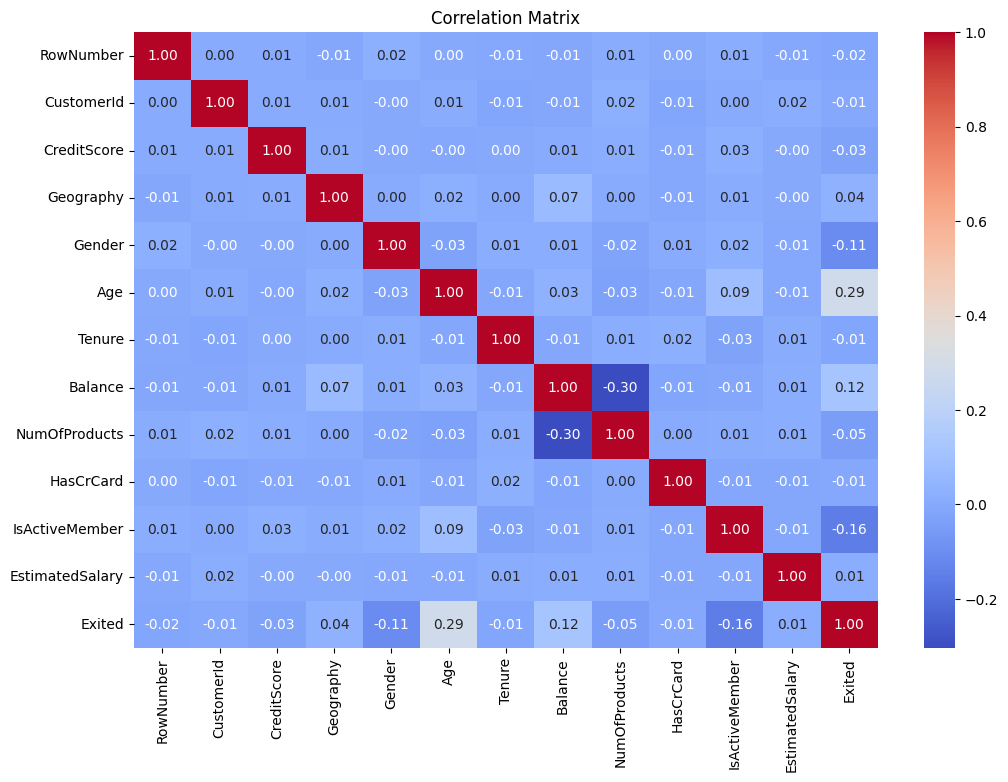

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dropping the 'Surname' column
data_numeric = data.drop(['Surname'], axis=1)

# Now calculate the correlation matrix
corr_matrix = data_numeric.corr()

# Display the correlation matrix
print(corr_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


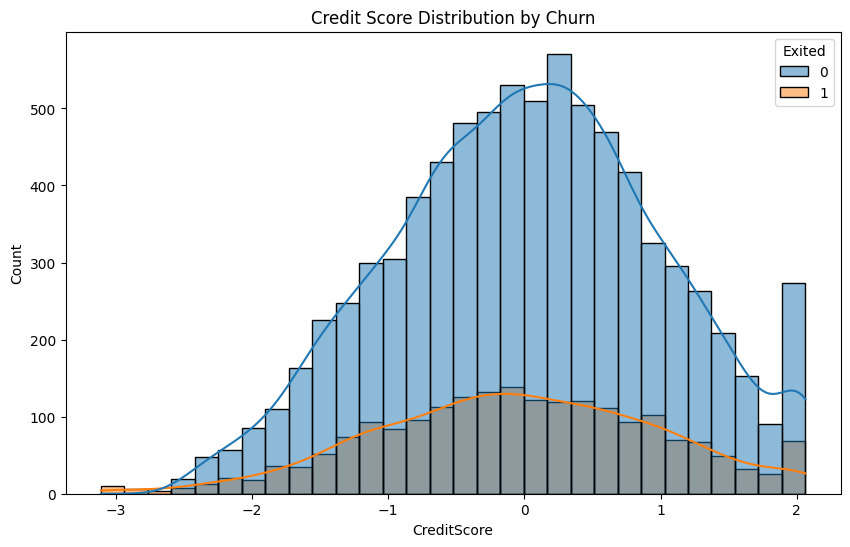

In [38]:
# Histogram for Credit Score
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="CreditScore", hue=y, kde=True, bins=30)
plt.title("Credit Score Distribution by Churn")
plt.show()


In [41]:
#  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [42]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)# Predict using the Random Forest model


In [43]:
# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8675
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



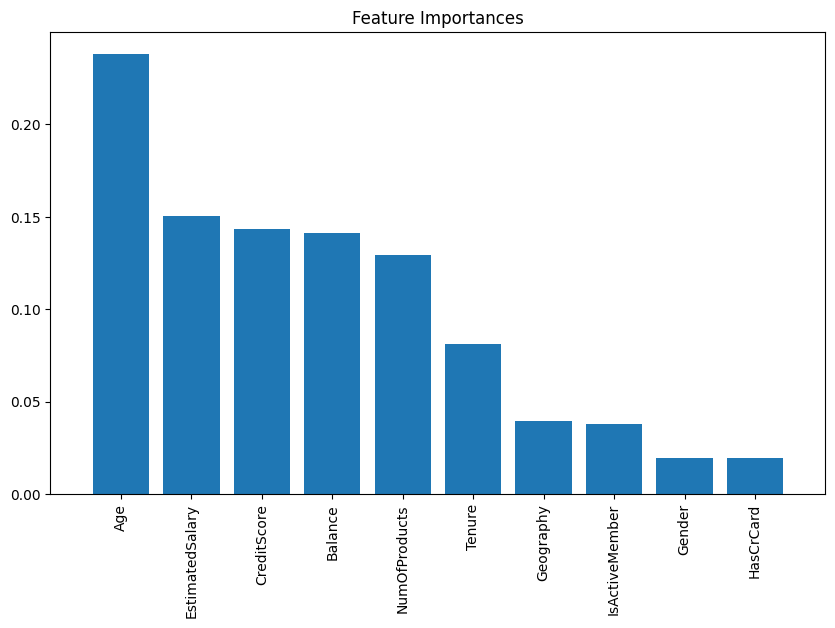

In [44]:
# Plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()


In [45]:
# Logistic Regression results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Random Forest results
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.807
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.58      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000

Random Forest Accuracy: 0.8675
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

